In [41]:
import Simulation as G
import RotRep as R
import numpy as np
import matplotlib.pyplot as plt
from IntBin import ReadI9BinaryFiles

In [52]:
exp={'energy':71.676}
etalimit=81/180.0*np.pi
grainpos=np.array([0.0629875, 0.0715063, 0])
orien=R.EulerZXZ2Mat(np.array([77.4227, 92.0245, 264.156])/180.0*np.pi)

reload(G)
sample=G.CrystalStr('gold')
#sample.setPrim([3.61,0,0],[0,3.61,0],[0,0,3.61])
#sample.addAtom([0,0,0],29)
sample.getRecipVec()
sample.getGs(10)


Det1=G.Detector()
Det1.Move(1031.42,1997.13,np.array([4.86407,0,0]),R.EulerZXZ2Mat(np.array([90.4307,90.0688,359.073])/180.0*np.pi))
Det1.Print()

Norm:  [ 0.99997103  0.00751706 -0.00120079]
CoordOrigin:  [ 4.87876216 -1.47841351  2.9800599 ]
J vector:  [-0.0075355   0.99984072 -0.01617848]
K vector:  [-0.00107898 -0.01618706 -0.9998684 ]


In [53]:
Peaks=[]
CorGs=[]
rotatedG=orien.dot(sample.Gs.T).T
for g1 in rotatedG:
    res=G.frankie_angles_from_g(g1,verbo=False,**exp)
    if res['chi']>=90:
        pass
    elif res['eta']>etalimit:
        pass
    else:
        if -90<=res['omega_a']<=90:
            omega=res['omega_a']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            try:
                idx=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],res['eta'])
            except:
                print g
                print res
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_a']])
                CorGs.append(g)
        if -90<=res['omega_b']<=90:
            omega=res['omega_b']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            idx=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],-res['eta'])
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_b']])
                CorGs.append(g)
Peaks=np.array(Peaks)
CorGs=np.array(CorGs)

In [48]:
%matplotlib notebook

<IPython.core.display.Javascript object>


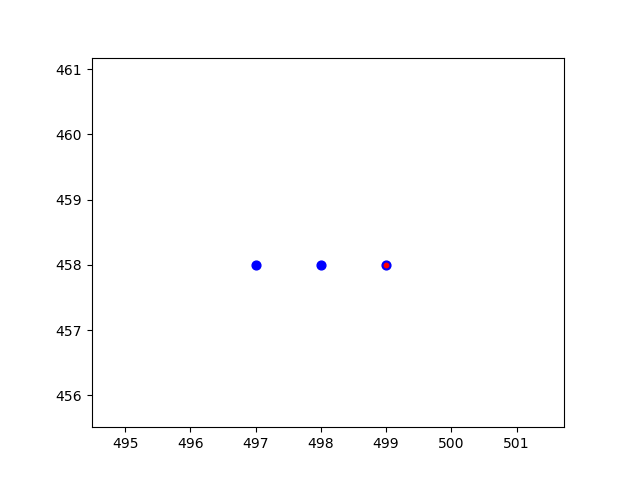

In [56]:
i=706
a=np.loadtxt('/work/yufengs/David/Sim/Au_Sim1_{0:05d}.bin0'.format(i),delimiter=',')
plt.scatter(2048-a[:,0],2048-a[:,1],c='b',s=40)
tmpidx=((-90+i*0.25<=Peaks)*(Peaks<-89.75+i*0.25))[:,2]
tmpPeaks=Peaks[tmpidx]
for ii in range(len(tmpPeaks)):
    plt.scatter(2048-tmpPeaks[ii][0],2048-tmpPeaks[ii][1],c='r',s=10)
plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()